In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
df=pd.read_csv('BankNote_Authentication.csv')

In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [12]:
df.isnull().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

In [13]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [20]:
df['entropy'].value_counts

<bound method IndexOpsMixin.value_counts of 0      -0.446990
1      -1.462100
2       0.106450
3      -3.594400
4      -0.988800
5      -3.162500
6       0.564210
7      -0.602160
8      -0.612510
9      -0.735350
10     -0.806470
11      0.862910
12     -3.110800
13     -2.936200
14     -0.572420
15      1.477100
16      0.586190
17      0.601700
18     -2.108600
19     -4.101300
20     -0.487080
21     -0.988800
22     -4.017200
23     -1.659900
24     -3.748300
25     -2.871500
26     -0.635780
27     -3.740500
28     -3.225800
29      1.090500
          ...   
1342    1.212000
1343    0.328860
1344    1.325800
1345   -2.111200
1346   -5.874100
1347   -5.918100
1348   -0.401730
1349    0.901700
1350    0.564210
1351    0.065071
1352   -1.425900
1353   -2.845700
1354   -3.523300
1355   -3.634500
1356   -0.653890
1357    0.429720
1358    0.003003
1359   -0.621560
1360   -0.805180
1361   -0.838800
1362   -1.678000
1363    0.661190
1364   -0.421130
1365   -0.528460
1366   -1.295300
1367

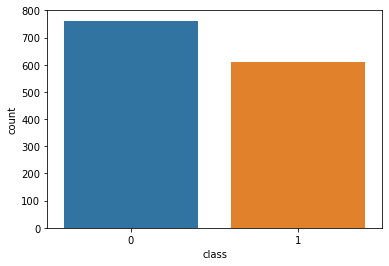

In [21]:
sns.countplot(x='class',data=df)

In [32]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


In [37]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred=rf.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)

In [43]:
cm

array([[214,   3],
       [  0, 195]], dtype=int64)

In [44]:
score

0.9927184466019418

In [46]:
import pickle
pickle.dump(rf,open('model1.pkl','wb'))

In [48]:
model=pickle.load(open('model1.pkl','rb'))

In [56]:
rf.predict([[3,4,5,1]])

array([0], dtype=int64)